In [60]:
#importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
train = pd.read_csv(r"C:\Users\bensu\Downloads\0000000000002429_training_titanic_x_y_train (1).csv")
test = pd.read_csv(r"C:\Users\bensu\Downloads\0000000000002429_test_titanic_x_test (1).csv")

In [101]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.050,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S,0


In [102]:
train.drop(['Name','Ticket'],axis = 1,inplace = True)

In [103]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,2,female,29.0,1,0,26.000,NaN,S,1
1,3,male,NaN,0,0,8.050,NaN,S,0
2,2,male,39.0,0,0,26.000,NaN,S,0
3,3,female,29.0,0,4,21.075,NaN,S,0
4,3,male,25.0,0,0,7.050,NaN,S,0


In [104]:
def male(g):
    if g == 'male':
        return 1
    else:
        return 0
def female(g):
    if g == 'female':
        return 1
    else:
        return 0

In [106]:
train['Male'] = train.Sex.apply(male)
train['Female'] = train.Sex.apply(female)

In [107]:
train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,female,29.0,1,0,26.000,NaN,S,1,0,1
1,3,male,NaN,0,0,8.050,NaN,S,0,1,0
2,2,male,39.0,0,0,26.000,NaN,S,0,1,0
3,3,female,29.0,0,4,21.075,NaN,S,0,0,1
4,3,male,25.0,0,0,7.050,NaN,S,0,1,0


In [108]:
train.drop('Sex',axis = 1,inplace = True)

In [109]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.0,1,0,26.000,NaN,S,1,0,1
1,3,NaN,0,0,8.050,NaN,S,0,1,0
2,2,39.0,0,0,26.000,NaN,S,0,1,0
3,3,29.0,0,4,21.075,NaN,S,0,0,1
4,3,25.0,0,0,7.050,NaN,S,0,1,0


In [110]:
def cabin(g):
    if g == np.nan:
        return 0
    else:
        return 1

In [111]:
train['Cabin'] = train.Cabin.apply(cabin)

In [112]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.0,1,0,26.000,1,S,1,0,1
1,3,NaN,0,0,8.050,1,S,0,1,0
2,2,39.0,0,0,26.000,1,S,0,1,0
3,3,29.0,0,4,21.075,1,S,0,0,1
4,3,25.0,0,0,7.050,1,S,0,1,0


In [113]:
train['Age'].fillna(train['Age'].mean(),inplace = True)

In [114]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,Male,Female
0,2,29.00000,1,0,26.000,1,S,1,0,1
1,3,29.70056,0,0,8.050,1,S,0,1,0
2,2,39.00000,0,0,26.000,1,S,0,1,0
3,3,29.00000,0,4,21.075,1,S,0,0,1
4,3,25.00000,0,0,7.050,1,S,0,1,0


In [115]:
def cherbourg(s):
    if s=="C":
        return 1
    else:
        return 0
    
def queenstown(s):
    if s=="Q":
        return 1
    else:
        return 0

def southamptom(s):
    if s=="S":
        return 1
    else:
        return 0

In [116]:
train["Cherbourg"] = train.Embarked.apply(cherbourg)
train["Queenstown"] = train.Embarked.apply(queenstown)
train["Southamptom"] = train.Embarked.apply(southamptom)
train.drop("Embarked",axis=1, inplace=True)
train.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Survived,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,29.00000,1,0,26.000,1,1,0,1,0,0,1
1,3,29.70056,0,0,8.050,1,0,1,0,0,0,1
2,2,39.00000,0,0,26.000,1,0,1,0,0,0,1
3,3,29.00000,0,4,21.075,1,0,0,1,0,0,1
4,3,25.00000,0,0,7.050,1,0,1,0,0,0,1


In [117]:
train.isnull().any()

Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
Cabin          False
Survived       False
Male           False
Female         False
Cherbourg      False
Queenstown     False
Southamptom    False
dtype: bool

In [118]:
train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Survived', 'Male',
       'Female', 'Cherbourg', 'Queenstown', 'Southamptom'],
      dtype='object')

In [119]:
train = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Male',
       'Female', 'Cherbourg', 'Queenstown', 'Southamptom','Survived']]

In [120]:
train = train.values

In [121]:
train.shape

(668, 12)

In [122]:
x = train[:,:-1]
y = train[:,-1]

In [123]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [124]:
train_scaled = scaler.transform(x)

In [125]:
train_scaled = np.append(train_scaled,np.ones(train_scaled.shape[0]).reshape(-1,1),axis =1)

In [126]:
train_scaled.shape,train_scaled[0].shape

((668, 12), (12,))

In [127]:
def sigmoid(agg):
    
    return 1/(1+np.exp(-agg))

def cost(X_train,Y_train,m):
    
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        cost = -Y_train[i]*np.log(h) - (1-Y_train[i])*np.log(1-h)
        cost_ += cost
    
    return cost_

def step_gradient(X_train,Y_train,lr,m):
    
    N = X_train.shape[0]
    slope_m = np.zeros(X_train.shape[1])
    for i in range(N):
        agg = (X_train[i]*m).sum()
        h = sigmoid(agg)
        slope_m+=(-1/N)*(Y_train[i]-h)*X_train[i]
        
    m = m - lr*slope_m
    return m

def fit(X_train,Y_train,epochs=100,lr=0.01):
    
    m = np.zeros(X_train.shape[1])
    cost_array = []
    unit = epochs//10
    for i in range(epochs+1):
        m = step_gradient(X_train,Y_train,lr,m)
        cost_ = cost(X_train,Y_train,m)
        cost_array.append(cost_)
        if i%unit==0:
            print("Epoch:{}, Cost:{}".format(i,cost_))
    
    return m,cost_array

def predict(X_test,m):
    
    y_pred = []
    N = X_test.shape[0]
    for i in range(N):
        agg = (X_test[i]*m).sum()
        h = sigmoid(agg)
        if h>=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
            
    return np.array(y_pred)

def accuracy(Y_test,Y_pred):
    
    correct = 0
    N = Y_test.shape[0]
    correct = (Y_test==Y_pred).sum()
    
    return (correct/N)*100

In [128]:
m,c = fit(train_scaled,y,3000,1)

Epoch:0, Cost:365.55226585434815
Epoch:300, Cost:303.383291946091
Epoch:600, Cost:303.3796552959986
Epoch:900, Cost:303.376406398662
Epoch:1200, Cost:303.37348742995067
Epoch:1500, Cost:303.37085137593516
Epoch:1800, Cost:303.3684596441411
Epoch:2100, Cost:303.3662802763188
Epoch:2400, Cost:303.36428659433716
Epoch:2700, Cost:303.36245616230246
Epoch:3000, Cost:303.3607699825016


In [129]:
print(m)

[-0.91428121 -0.50726464 -0.33019191 -0.1242745   0.04776298  0.
 -0.6455607   0.6455607  -0.14761959 -0.09021758 -0.32263714 -0.51208237]


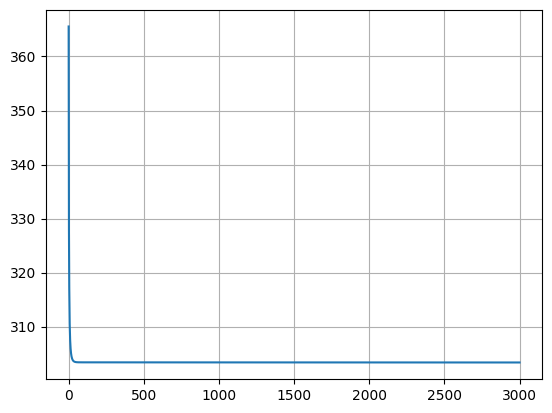

In [130]:
sns.lineplot(c)
plt.grid()
plt.show()

In [131]:
y_train_pred = predict(train_scaled,m)

In [132]:
accuracy(y,y_train_pred)

79.04191616766467

### Loading Testing Data

In [134]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S
1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S
2,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
3,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
4,1,"McGough, Mr. James Robert",male,36.0,0,0,PC 17473,26.2875,E25,S


In [135]:
test.drop(['Name','Ticket'],axis = 1,inplace= True)

In [136]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,2,male,8.0,1,1,36.7500,NaN,S
1,1,female,49.0,0,0,25.9292,D17,S
2,3,male,NaN,0,0,7.7375,NaN,Q
3,2,female,24.0,2,1,27.0000,NaN,S
4,1,male,36.0,0,0,26.2875,E25,S


In [138]:
test['Male'] = test.Sex.apply(male)
test['Female'] = test.Sex.apply(female)

In [139]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Male,Female
0,2,male,8.0,1,1,36.7500,NaN,S,1,0
1,1,female,49.0,0,0,25.9292,D17,S,0,1
2,3,male,NaN,0,0,7.7375,NaN,Q,1,0
3,2,female,24.0,2,1,27.0000,NaN,S,0,1
4,1,male,36.0,0,0,26.2875,E25,S,1,0


In [140]:
test.drop('Sex',axis = 1,inplace =True)

In [141]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male,Female
0,2,8.0,1,1,36.7500,NaN,S,1,0
1,1,49.0,0,0,25.9292,D17,S,0,1
2,3,NaN,0,0,7.7375,NaN,Q,1,0
3,2,24.0,2,1,27.0000,NaN,S,0,1
4,1,36.0,0,0,26.2875,E25,S,1,0


In [142]:
test['Age'].fillna(test['Age'].mean(),inplace = True)

In [143]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male,Female
0,2,8.000000,1,1,36.7500,NaN,S,1,0
1,1,49.000000,0,0,25.9292,D17,S,0,1
2,3,29.694775,0,0,7.7375,NaN,Q,1,0
3,2,24.000000,2,1,27.0000,NaN,S,0,1
4,1,36.000000,0,0,26.2875,E25,S,1,0


In [144]:
test['Cabin'] = test.Cabin.apply(cabin)

In [145]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,Male,Female
0,2,8.000000,1,1,36.7500,1,S,1,0
1,1,49.000000,0,0,25.9292,1,S,0,1
2,3,29.694775,0,0,7.7375,1,Q,1,0
3,2,24.000000,2,1,27.0000,1,S,0,1
4,1,36.000000,0,0,26.2875,1,S,1,0


In [146]:
test["Cherbourg"] = test.Embarked.apply(cherbourg)
test["Queenstown"] = test.Embarked.apply(queenstown)
test["Southamptom"] = test.Embarked.apply(southamptom)
test.drop("Embarked",axis=1, inplace=True)
test.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Male,Female,Cherbourg,Queenstown,Southamptom
0,2,8.000000,1,1,36.7500,1,1,0,0,0,1
1,1,49.000000,0,0,25.9292,1,0,1,0,0,1
2,3,29.694775,0,0,7.7375,1,1,0,0,1,0
3,2,24.000000,2,1,27.0000,1,0,1,0,0,1
4,1,36.000000,0,0,26.2875,1,1,0,0,0,1


In [147]:
test.isnull().any()

Pclass         False
Age            False
SibSp          False
Parch          False
Fare           False
Cabin          False
Male           False
Female         False
Cherbourg      False
Queenstown     False
Southamptom    False
dtype: bool

In [148]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Male', 'Female',
       'Cherbourg', 'Queenstown', 'Southamptom'],
      dtype='object')

In [149]:
test = test[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Male', 'Female',
       'Cherbourg', 'Queenstown', 'Southamptom']]

In [150]:
test = test.values

In [151]:
test.shape

(223, 11)

In [152]:
test_scaled = scaler.transform(test)

In [153]:
test_scaled = np.append(test_scaled,np.ones(test_scaled.shape[0]).reshape(-1,1),axis =1)

In [154]:
test_scaled.shape,test_scaled[0].shape

((223, 12), (12,))

### Getting The Prediction

In [155]:
y_pred = predict(test_scaled,m)

In [156]:
np.savetxt("Prediction_Titanic_Logistic.csv",y_pred,delimiter=',')